<a href="https://colab.research.google.com/github/HurleyJames/GoogleColabExercise/blob/master/Intro_to_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **COMP5623 Artificial Intelligence**
University of Leeds
Spring 2019-2020


The purpose of this notebook is to give you a general understanding of how to use the PyTorch Python package for writing, training and analysing neural networks. Only the key topics are covered, and many references are included to documentation and other helpful resources.



---

### **Introduction to PyTorch**


Why PyTorch in this module instead of TensorFlow, Keras, Theano, etc.?

- Simplicity but not oversimplified
- API
- Performance

![why_pytorch.png](https://drive.google.com/uc?id=1EQqmbiKtXFVTcqGsxnIu_hqVy7vV1Lyp)

Some real evidence that researchers are moving steadily towards PyTorch:

https://thegradient.pub/state-of-ml-frameworks-2019-pytorch-dominates-research-tensorflow-dominates-industry/


---


### Some recommended resources

- Pytorch 60-min Blitz Tutorial https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html
- PyTorch Deep Learning Hands-On by Sherin Thomas and Sudhanshu Passi
- Stanford Spring 2019 CS231n Convolutional Neural Networks for Visual Recognition http://cs231n.stanford.edu/, particularly Lecture 6 on PyTorch.
- "A Beginner-Friendly Guide to PyTorch and How it Works from Scratch" https://www.analyticsvidhya.com/blog/2019/09/introduction-to-pytorch-from-scratch/
- The “Image classification (MNIST) using Convnets” example from the PyTorch Git repository (https://github.com/pytorch/examples)





---





As an overview, this notebook covers:

1. Tensors
2. Gradients
3. Datasets
4. Neural networks
5. Training (+ training on a GPU)


***Welcome to come to lab to work through this notebook and ask questions!***

---

### 1. Tensors

In [0]:
import torch

A Tensor - the basic building block. Similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU.

In [0]:
x = torch.tensor([5.0, 3, 6.6, 1])

In [0]:
x

tensor([5.0000, 3.0000, 6.6000, 1.0000])

NumPy-like behaviour for array operations - not a regular Python list.

In [0]:
x + 1

tensor([6.0000, 4.0000, 7.6000, 2.0000])

PyTorch tensors can be on your CPU or GPU. You can explicitly copy it back and forth.  We will look into this more later in this notebook.

### 2. Gradients

PyTorch tensors are more powerful than NumPy ndarrays when we are interested in propagating gradients.

Neural networks are trained via two operations:

- a forward pass
- a backward pass

Both the gradient, and forward and backward pass functions are attached to PyTorch's Tensor object.

![gradients](https://drive.google.com/uc?id=1bJavTiS98fioAN4ipI82o_Mej4CTI23_)

Slide 51, Backpropagation of Gradients, Lecture "Image Classification using CNNs"

---


Setting **require_grad=True** makes PyTorch track all the operations on that Tensor. When you finish the computation, you can call .backward() on it and the gradients are stored in the **.grad** attribute.

- https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
https://towardsdatascience.com/

- https://towardsdatascience.com/getting-started-with-pytorch-part-1-understanding-how-automatic-differentiation-works-5008282073ec

In [0]:
x = torch.tensor([4.0, 5.0, 6.0], requires_grad=True)
x

tensor([4., 5., 6.], requires_grad=True)

Does **x** have a grad_fn?

In [0]:
x.grad_fn

In [0]:
z = x + 2

In [0]:
z

tensor([6., 7., 8.], grad_fn=<AddBackward0>)

To illustrate how powerful this can be, let's look at the computational graph from the example above. 

Consider first what this would look like in NumPy.

In [0]:
import numpy as np

x = np.array([1.0, 2.0, 3.0])
w = np.array([4.0, 5.0, 6.0])
v = np.array([7.0, 8.0, 9.0])

y = x * w

We could compute the gradient for **w** manually using NumPy.

![loss](https://drive.google.com/uc?id=1eFM0lRxRlbWXGgB5-0lU-SgUIAT08uny)

In [0]:
grad_w = v * w

print("grad_w:", grad_w)

grad_w: [28. 40. 54.]


Now, build the same computational graph in PyTorch.

In [0]:
w = torch.tensor((1.0,2.0,3.0), requires_grad=True)
x = torch.tensor((4.0,5.0,6.0))
v = torch.tensor((7.0,8.0,9.0))

y = w * x

Now, with one function call on the output tensor:

In [0]:
y.backward(v)

Now we can directly access the gradient on w, which has been calculated for us.

In [0]:
w.grad

tensor([28., 40., 54.])

If you don't want to track gradients, you can put code inside a **with torch.no_grad()** block. This saves memory. 

### 3. Datasets

We will only cover this briefly, as this code will be provided for you for the coursework dataset. It is helpful to know generally how it works.

**Transforms** are common image transformations which can be chained together using Compose().

https://pytorch.org/docs/stable/torchvision/transforms.html

In [0]:
from torchvision import transforms

In [0]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

Certain commonly-used public datasets are available directly via PyTorch, through **torchvision.datasets**.

In [0]:
import torchvision

Listing of all available datasets here: https://pytorch.org/docs/stable/torchvision/datasets.html

In [0]:
# Load the datasets from PyTorch
train_set = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_set = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


If you are using a dataset not listed, you can create a custom Dataset class which will inherit the PyTorch parent Dataset class. It can then be loaded the same way.

Data loaders are provided by **torch.utils.data** and help for easy iteration over datasets. 

https://pytorch.org/tutorials/beginner/data_loading_tutorial.html

In [0]:
train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=16,
    shuffle=True,
    num_workers=2
)


test_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=24, # Forward pass only so batch size can be larger
    shuffle=False,
    num_workers=2
)

classes = np.arange(0, 10)

To iterate over the test set, one batch at a time, we do the following:

In [0]:
# 24 images at a time
for i, data in enumerate(test_loader, 0):
    images, labels = data
    print("Batch", i, "size:", len(images))
    
    # Do stuff with the images and labels.
    break # Terrible programming. Just for illustration.

Batch 0 size: 24


Note that the length of a loader is the *number of batches*, not the total number of images.

In [0]:
len(test_loader)

417

If you want to look at the images in the set one by one, you can define a loader with batch_size of 1 and iterate over it using an iterator.

In [0]:
extra_loader = torch.utils.data.DataLoader(
    test_set,
    batch_size=1,
    shuffle=False,
)

iterator = iter(extra_loader)

In [0]:
# iterator.next()

### 4. Neural networks

There are two steps:

1. Define the network.
2. Specify a loss function and optimizer.

First, we recommend defining the network as a class. The **nn** or Neural Network part of PyTorch contains all the classes and functions related to defining a neural network.

In [0]:
import torch.nn as nn

Let's build a simple linear classifier.

All networks should inherit from the **nn.Module** parent class: https://pytorch.org/docs/stable/nn.html#module

**nn.Module** stores learnable weights and state.

You will always need two functions:

1. __init__, which will be called the moment you instantiate the class.

2. **forward()** function which will be called during training.

The documentation for all the nn.Module layers supported by PyTorch is here https://pytorch.org/docs/stable/nn.html, including:

- Conv2D
- MaxPool2D
- ReLU
- Dropout2D
- many, many more.


In [0]:
class LinearClassifier(nn.Module):
    
    def __init__(self, num_classes=10):
        # Calls __init__() on the parent class, which is nn.Module
        super(LinearClassifier, self).__init__()
        
        # Define each layer of the network as a class variable
        # fc1 stands for first fully-connected layer
        self.fc1 = nn.Linear(28 * 28, num_classes)
        
    def forward(self, x):
        out = x.reshape(x.size(0), -1) # TODO what does this do? Why do we need it?
        out = self.fc1(out)
        return out

You can optionally seed the Random Number Generator across all devices for testing purposes.

In [0]:
torch.manual_seed(0)

We can now create a classifier instance.

In [0]:
model = LinearClassifier()
model

LinearClassifier(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)

The layers can be accessed directly and so can their parameters!

In [0]:
model.fc1

Linear(in_features=784, out_features=10, bias=True)

In [0]:
model.fc1.weight

Parameter containing:
tensor([[-0.0003,  0.0192, -0.0294,  ...,  0.0219,  0.0037,  0.0021],
        [-0.0198, -0.0150, -0.0104,  ..., -0.0203, -0.0060, -0.0299],
        [-0.0201,  0.0149, -0.0333,  ..., -0.0203,  0.0012,  0.0080],
        ...,
        [ 0.0237,  0.0103, -0.0219,  ...,  0.0088, -0.0009,  0.0009],
        [ 0.0144, -0.0336, -0.0346,  ..., -0.0222, -0.0025, -0.0138],
        [-0.0196, -0.0118,  0.0230,  ..., -0.0202,  0.0172,  0.0355]],
       requires_grad=True)

Now define the loss and optimiser.


- Optimisers https://pytorch.org/docs/stable/optim.html
- Loss functions https://pytorch.org/docs/stable/nn.html#loss-functions

In [0]:
from torch import optim

In [0]:
criterion = nn.CrossEntropyLoss()

# Stochastic gradient descent
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### 5. Training

During training, we iterate over a fixed number of epochs. An epoch is *one complete iteration through the entire training set.* 

You can either fix the number of epochs to train for, or can dynamically determine when to stop training. Alternately, you can checkpoint frequently over a large fixed number of epochs and then determine the best model later. 

It is highly advised to use a validation set (not shown here).

In [0]:
import timeit

In [0]:
def train_model_epochs(num_epochs):
    """ Trains the model for a given number of epochs on the training set. """
    for epoch in range(num_epochs):

        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            images, labels = data

            # Zero the parameter gradients means to reset them from
            # any previous values. By default, gradients accumulate!
            optimizer.zero_grad()

            # Passing inputs to the model calls the forward() function of
            # the Module class, and the outputs value contains the return value
            # of forward()
            outputs = model(images)

            # Compute the loss based on the true labels
            loss = criterion(outputs, labels)

            # Backpropagate the error with respect to the loss
            loss.backward()

            # Updates the parameters based on current gradients and update rule;
            # in this case, defined by SGD()
            optimizer.step()

            # Print our loss
            running_loss += loss.item()
            if i % 1000 == 999:    # print every 1000 mini-batches
                print('Epoch / Batch [%d / %d] - Loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 1000))
                running_loss = 0.0

Train and time.

In [0]:
# train_model_epochs(num_epochs)

cpu_train_time = timeit.timeit(
    "train_model_epochs(num_epochs)",
    setup="num_epochs=6",
    number=1,
    globals=globals(),
)

Epoch / Batch [1 / 1000] - Loss: 0.665
Epoch / Batch [1 / 2000] - Loss: 0.417
Epoch / Batch [1 / 3000] - Loss: 0.388
Epoch / Batch [1 / 4000] - Loss: 0.353
Epoch / Batch [1 / 5000] - Loss: 0.340
Epoch / Batch [1 / 6000] - Loss: 0.327
Epoch / Batch [1 / 7000] - Loss: 0.346
Epoch / Batch [2 / 1000] - Loss: 0.324
Epoch / Batch [2 / 2000] - Loss: 0.341
Epoch / Batch [2 / 3000] - Loss: 0.317
Epoch / Batch [2 / 4000] - Loss: 0.335
Epoch / Batch [2 / 5000] - Loss: 0.305
Epoch / Batch [2 / 6000] - Loss: 0.306
Epoch / Batch [2 / 7000] - Loss: 0.315
Epoch / Batch [3 / 1000] - Loss: 0.305
Epoch / Batch [3 / 2000] - Loss: 0.308
Epoch / Batch [3 / 3000] - Loss: 0.304
Epoch / Batch [3 / 4000] - Loss: 0.314
Epoch / Batch [3 / 5000] - Loss: 0.289
Epoch / Batch [3 / 6000] - Loss: 0.317
Epoch / Batch [3 / 7000] - Loss: 0.309
Epoch / Batch [4 / 1000] - Loss: 0.270
Epoch / Batch [4 / 2000] - Loss: 0.298
Epoch / Batch [4 / 3000] - Loss: 0.302
Epoch / Batch [4 / 4000] - Loss: 0.309
Epoch / Batch [4 / 5000] 

In [0]:
cpu_train_time

111.31756184400001

How does the classifier perform on the test set?

In [0]:
correct = 0
total = 0

# Why don't we need gradients? What happens if we do include gradients?
with torch.no_grad():
    
    # Iterate over the test set
    for data in test_loader:
        images, labels = data
        
        outputs = model(images)
        
        # torch.max is an argmax operation
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print("correct: %d" % correct)
print("total: %d" % total)
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

correct: 9204
total: 10000
Accuracy of the network on the test images: 92 %


In [0]:
labels

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [0]:
predicted

tensor([1, 2, 8, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

You can save and reload models. Torch models are checkpoint files.

https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [0]:
torch.save(model, './my_mnist_model.pt') 

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type LinearClassifier. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Accuracy and confusion matrix.

In [0]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [0]:
cm = confusion_matrix(labels, predicted)

In [0]:
cm

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

Let's make it easier for viewing.

In [0]:
import itertools

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix very prettily.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    # Specify the tick marks and axis text
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    # The data formatting
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Print the text of the matrix, adjusting text colour for display
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

Confusion matrix, without normalization


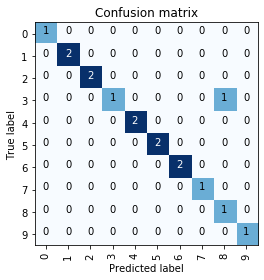

In [0]:
plot_confusion_matrix(cm, classes)

### 5b (optional) Training on a GPU

One of the main advantages that Tensors have over NumPy arrays, and which make them so powerful, is that they can be easily moved to a GPU.

Why GPU?

- many cores = faster at parallel tasks
- CPU vs GPU benchmarks training a CNN https://github.com/jcjohnson/cnn-benchmarks

Where's the data?
Where's the model?
Where does the data go when you train the model?

![computer.png](https://drive.google.com/uc?id=11uBHkC5tznLhNIGAn0mrggSC2LMEXlYC)



First get PyTorch to find the device available.

In [0]:
# Device configuration - defaults to CPU unless GPU is available on device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

How do we put the **model** on the GPU?

In [0]:
model_gpu = LinearClassifier().to(device)

How do we put the **data** on the GPU? (Below code is a copy of the training code above, just simplified without comments and loss printing.)

In [0]:
def train_model_epochs2(num_epochs):
    """ Copy of function train_model_epochs but explicitly copying data to device 
        during training. 
    """
    for epoch in range(num_epochs):

        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            images, labels = data

            # Explicitly specifies that data is to be copied onto the device!
            images = images.to(device)  # <----------- And note it's NOT an in-place operation; original
            labels = labels.to(device)  # <----------- variables still exist on CPU

            optimizer.zero_grad()
            outputs = model_gpu(images)

            loss = criterion(outputs, labels)
            loss.backward()

            optimizer.step()
            running_loss += loss.item()
            if i % 1000 == 999:    # print every 1000 mini-batches
                print('Epoch / Batch [%d / %d] - Loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 1000))
                running_loss = 0.0

Train an identical second model on the GPU.

In [0]:
# gpu_train_time = timeit.timeit(
#     "train_model_epochs2(num_epochs)",
#     setup="num_epochs=6",
#     number=1,
#     globals=globals(),
# )

Feel free to compare **cpu_train_time** with **gpu_train_time**, keeping in mind that an inappropriate batch size may give you surprising results! Remember that copying data to the GPU also has an overhead.

For those curious about optimisation on a GPU, NVidia's article on [NVidia's Deep Learning Performance Guide](https://docs.nvidia.com/deeplearning/sdk/dl-performance-guide/index.html) is helpful.